# Análisis de simulación de sorteos de la Copa Libertadores 2022.

El objetivo de este notebook es analizar los posibles grupos en los que se ubicaría Universidad Católica en la Copa Libertadores 2022.

## 1. Obtención de los datos.

Los datos se obtuvieron realizando más de 10.000 simulaciones de sorteos de la Copa Libertadores, utilizando la función _sortear_ del archivo sorteo.py ubicado en el repositorio [sorteo_libertadores](https://github.com/mumoyarce96/sorteo_libertadores).

## 2. Descripción de los datos.

Cada fila corresponde a un equipo. Los datos tienen los siguientes features:
- **Bombo:** Bombo o bolillero en el que se encontraba el equipo. 
- **Equipo:** Nombre del equipo.
- **Pais:** País del que el equipo es originario. Los equipos provenientes de las fases previas tienen _fase previa_ como valor en este feature.
- **Grupo:** De A a H. Representa en qué grupo esta ubicado el equipo.
- **id_sorteo:** Este feature permite diferenciar los distintos sorteos simulados.


Inicialmente, los datos se ubican en la carpeta sorteos de este repositorio y cada simulación se encuentra en un archivo con el nombre sorteo+id_sorteo.csv. Por lo tanto, el primer paso en este análisis es juntar los datos de todos los sorteos en un dataframe y exportarlos a un archivo .csv llamado sorteos.csv para no tener que repetir este paso.

A continuación se muestra el código de este primer paso, pero se deja comentado para evitar que se ejecute, debido a toma mucho tiempo en hacerlo. Es mejor saltarse esta celda y pasar a la celda de carga del archivo sorteos.csv.

In [1]:
# Saltar esta celda y ejecutar la siguiente
import pandas as pd
import glob
import os

path = r'./sorteos'        
all_files = glob.glob(os.path.join(path, "*.csv"))    

# Cargar dataframe de sorteos de cada archivo
#df_from_each_file = (pd.read_csv(f) for f in all_files)
# Concatenar todos los dataframes
#sorteos  = pd.concat(df_from_each_file, ignore_index=True)
# Exportar a archivo sorteos.csv 
#sorteos.to_csv('sorteos.csv', index = False)

In [2]:
# Ejecutar esta celda
# Cargar archivo sorteos.csv a la variable df.
import pandas as pd
df = pd.read_csv('sorteos.csv')

# MOSTRAR EQUIPOS POR BOMBO

## 3. Filtrar datos y corregir.

Como el objetivo es analizar los posibles grupos de Universidad Católica (UC), se filtran los datos para quedarse sólo con los equipos que comparten grupo con la UC para cada sorteo (id_sorteo). Esta celda se tarda en ejecutar, por lo que se recomienda saltarsela y cargar el archivo grupos_uc.csv en la celda siguiente.

In [12]:
# Saltarse esta celda

# Los distintos grupos de la UC se guardarán en el dataframe df_uc
#df_uc =pd.DataFrame()

# Para cada id_sorteo quedarse sólo con los grupos de la UC.
for ID in df['id_sorteo'].unique():
    # Quedarse sólo con un sorteo
    temp_df = df[df['id_sorteo'] == ID]
    # Buscar en qué grupo se encuentra la UC
    grupo_uc = temp_df[temp_df['Equipo'] == 'Universidad Católica']['Grupo'].to_string(index = False)
    # Filtrar temp_df para quedarse sólo con el grupo de la UC
    temp_df = temp_df[temp_df['Grupo'] == grupo_uc]
    # Concatenar temp_df a df_uc
    #df_uc = pd.concat([df_uc, temp_df], ignore_index = True)

# Guardar dataframe en archivo grupos_uc.csv
df_uc.to_csv('grupos_uc.csv', index = False)

A continuación, se cargan los grupos de la UC y se corrige el país de los equipos provenientes de la fase previa, estos equipos son:
- Olimpia de Paraguay.
- The Strongest de Bolivia.
- Estudiantes de La Plata de Argentina.
- América de Brasil.

In [54]:
import pandas as pd
# Cargar grupos_uc.csv
df_uc = pd.read_csv('grupos_uc.csv')

# Lista equipos contiene el nombre de los equipos provenientes de fase previa y lista países contiene sus respectivos países.
equipos = ['Olimpia', 'The Strongest', 'Estudiantes L.P.', 'América M.G.']
paises = ['Paraguay', 'Bolivia', 'Argentina', 'Brasil']

# Modificar valores de columna Pais en dataframe.
for i in range(len(equipos)):
    df_uc.loc[df_uc['Equipo'] == equipos[i], 'Pais'] = paises[i]

## 4. Análisis de datos.

Para todo el análisis de los datos hay que tener muy presente que el sorteo de los grupos de la Copa Libertadores tiene como regla que no pueden haber dos equipos del mismo país en el mismo grupo, a menos que uno de ellos provenga de las fases previas de la copa. Los equipos clasificados de la frase previa son los que se mencionaron en la sección anterior.

### 4.1. Distribución grupo en que se ubica la UC. 

En primer lugar, se analiza en la distribución de grupos (letras) en que se ubica la UC. Se esperaría que esta distribución sea uniforme, pero debido a que Palmeiras siempre ocupa el grupo A y a la restricción de no poder tener dos equipos del mismo país probablemente este no sea el caso.

# DECIR QUE SE CREÓ LA FUNCIÓN AGRUPAR

,Sorteos (%)
Grupo,
A,13.95
B,12.95
C,12.36
D,12.19
E,12.02
F,12.04
G,11.49
H,13.00


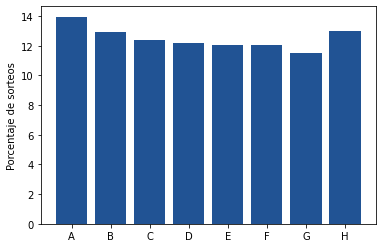

In [220]:
# Se importa matplotlib.pyplot
import matplotlib.pyplot as plt

# Crear función de agrupar
def agrupar(df, columna, ordenar = True, grafico = True, rotacion = 60):
    agrupado = round(df.groupby(columna).count() / df.groupby(columna).count().sum() * 100, 2)
    data = agrupado.iloc[:, 0]
    output = pd.DataFrame(data = data).rename(columns = {data.name: 'Sorteos (%)'})
    if ordenar:
        output.sort_values(by = 'Sorteos (%)', ascending = False, inplace = True)
    if grafico:
        plt.bar(x = output.index, height = output['Sorteos (%)'], color = '#215394')
        plt.ylabel('Porcentaje de sorteos')
        if columna == 'Equipo':
            plt.xticks(rotation = rotacion)
        elif columna == 'Pais' and rotacion != 60:
            plt.xticks(rotation= rotacion)
    return output 

# Se ordena el dataframe por grupo para que en el gráfico aparezcan con orden 
df_uc = df_uc.sort_values(by='Grupo')

agrupar(df_uc, 'Grupo', ordenar=False)

### DECIR QUE PASA.

### 4.2. Distribución de rivales de cada bombo.

Analizar distribución de rivales del bombo 1, del bombo 3 y del bombo 4. Evidentemente el bombo 2 no se analiza porque ese es el bombo de la UC.

In [186]:
# Filtrar equipos por número de bombo en que se ubicaban.
B1 = df_uc[df_uc['Bombo'] == 1]
B3 = df_uc[df_uc['Bombo'] == 3]
B4 = df_uc[df_uc['Bombo'] == 4]

#### 4.2.1. Bombo 1.

,Sorteos (%)
Equipo,
Athletico Paranaense,14.08
Palmeiras,13.95
Atlético Mineiro,13.39
Flamengo,13.37
River Plate,12.73
Boca Juniors,12.38
Peñarol,10.13
Nacional,9.97


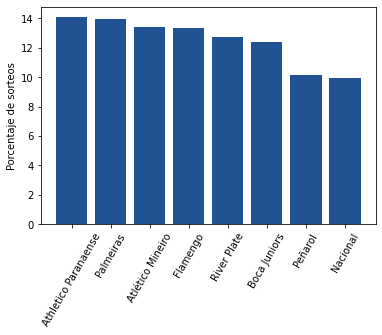

In [187]:
agrupar(B1, 'Equipo')

,Sorteos (%)
Pais,
Brasil,54.79
Argentina,25.12
Uruguay,20.09


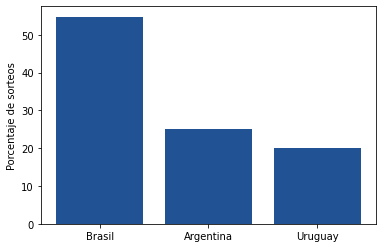

In [188]:
agrupar(B1, 'Pais')

Los equipos más comunes son los brasileños, seguidos por los argentinos y los uruguayos. El menor porcentaje de equipos uruguayos obedece a la regla de evitar que un grupo tenga dos equipos del mismo país. Como en el bombo 2 hay un equipo brasileño (Bragantino) y uno argentino (Vélez), esta regla hace que sea más probable que la UC comparta grupo con equipos brasileños o argentinos que con equipos uruguayos. 

En más del 50% de los sorteos el equipo del bombo 1 que comparte grupo con la UC es brasileño, lo que se debe a dos factores: 
1. La mitad de equipos de este bombo son brasileños.
2. La regla de no tener dos equipos del mismo país en el mismo grupo.

#### 4.2.2. Bombo 3.

,Sorteos (%)
Equipo,
Bragantino,15.42
Colón,14.87
Deportivo Táchira,11.77
Sporting Cristal,11.74
Alianza Lima,11.63
Deportes Tolima,11.62
Caracas,11.49
Deportivo Cali,11.46


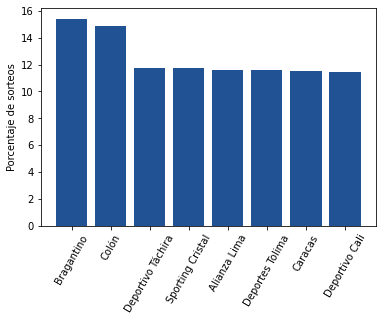

In [189]:
agrupar(B3, 'Equipo')

,Sorteos (%)
Pais,
Perú,23.37
Venezuela,23.26
Colombia,23.08
Brasil,15.42
Argentina,14.87


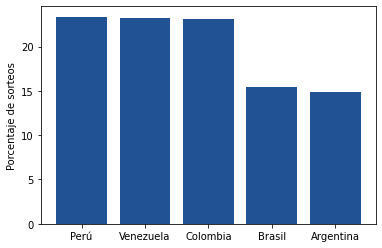

In [190]:
agrupar(B3, 'Pais')

#### 4.2.3. Bombo 4.

,Sorteos (%)
Equipo,
Fortaleza,14.74
Talleres,14.23
Always Ready,12.38
América M.G.,12.29
Estudiantes L.P.,11.69
The Strongest,11.62
Olimpia,11.60
Independiente Petrolero,11.44


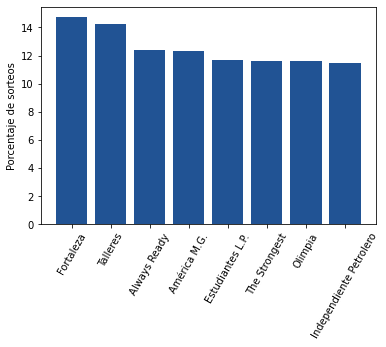

In [191]:
agrupar(B4, 'Equipo')

,Sorteos (%)
Pais,
Bolivia,35.44
Brasil,27.04
Argentina,25.92
Paraguay,11.60


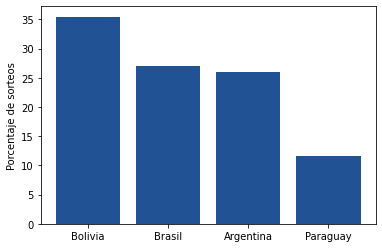

In [192]:
agrupar(B4, 'Pais')

# **Agregar análisis de todo esto**

#### 4.2.4. Análisis condicional.

Distribución de rivales de los bombos 3 y 4 dados rivales del bombo 1.


In [193]:
B1_brasil = B1[B1['Pais'] == 'Brasil']
B1_argentina = B1[B1['Pais'] == 'Argentina']
B1_uruguay = B1[B1['Pais'] == 'Uruguay']

**Si el rival del bombo 1 es brasileño:**

In [207]:
# Buscar sorteos con equipos brasileños en B1 (por id).
temp_df = df_uc[df_uc['id_sorteo'].isin(B1_brasil['id_sorteo'].to_list())]

# Filtrar por bombos
temp_B3 = temp_df[temp_df['Bombo'] == 3]
temp_B4 = temp_df[temp_df['Bombo'] == 4]
temp_B3_y_B4 = temp_df[temp_df['Bombo'].isin([3, 4])]

Bombo 3:

,Sorteos (%)
Equipo,
Colón,20.92
Deportivo Táchira,13.60
Alianza Lima,13.48
Deportivo Cali,13.35
Sporting Cristal,12.94
Caracas,12.88
Deportes Tolima,12.82


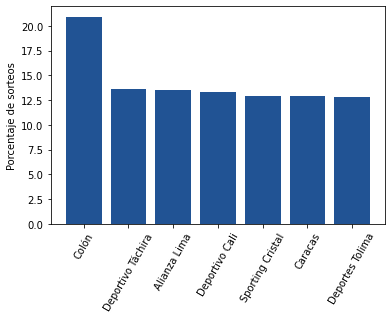

In [242]:
agrupar(temp_B3, 'Equipo')

,Sorteos (%)
Pais,
Venezuela,26.49
Perú,26.43
Colombia,26.17
Argentina,20.92


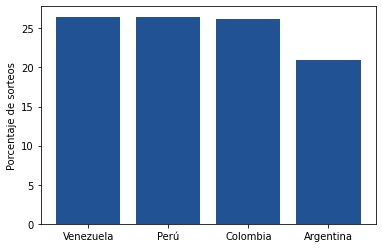

In [243]:
agrupar(temp_B3, 'Pais')

Bombo 4:

,Sorteos (%)
Equipo,
Talleres,19.89
Always Ready,14.45
América M.G.,13.41
Independiente Petrolero,13.23
Estudiantes L.P.,13.20
Olimpia,13.12
The Strongest,12.70


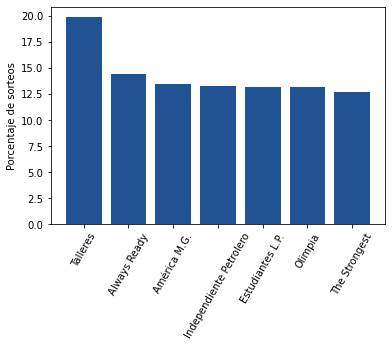

In [244]:
agrupar(temp_B4, 'Equipo')

,Sorteos (%)
Pais,
Bolivia,40.38
Argentina,33.09
Brasil,13.41
Paraguay,13.12


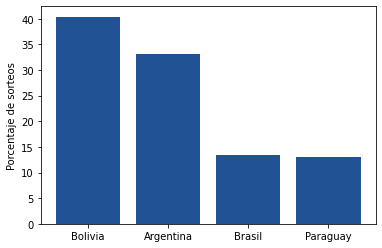

In [245]:
agrupar(temp_B4, 'Pais')

Bombos B3 y B4 en conjunto

,Sorteos (%)
Equipo,
Colón,10.46
Talleres,9.95
Always Ready,7.22
Deportivo Táchira,6.80
Alianza Lima,6.74
América M.G.,6.70
Deportivo Cali,6.67
Independiente Petrolero,6.61
Estudiantes L.P.,6.60


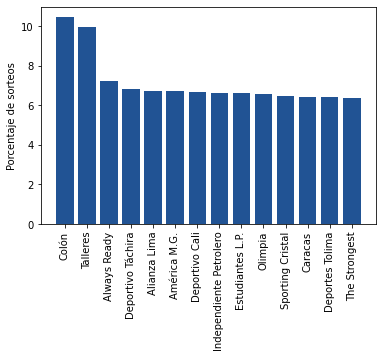

In [208]:
agrupar(temp_B3_y_B4, 'Equipo', rotacion = 90)

,Sorteos (%)
Pais,
Argentina,27.01
Bolivia,20.19
Venezuela,13.24
Perú,13.21
Colombia,13.09
Brasil,6.70
Paraguay,6.56


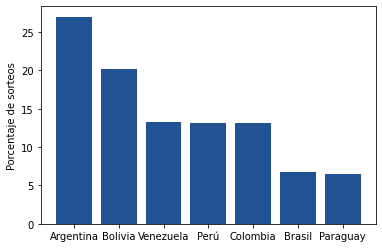

In [209]:
agrupar(temp_B3_y_B4, 'Pais')

**Si el rival del bombo 1 es argentino:**

In [210]:
# Buscar sorteos con equipos argentinos en B1 (por id).
temp_df = df_uc[df_uc['id_sorteo'].isin(B1_argentina['id_sorteo'].to_list())]

# Filtrar por bombos
temp_B3 = temp_df[temp_df['Bombo'] == 3]
temp_B4 = temp_df[temp_df['Bombo'] == 4]
temp_B3_y_B4 = temp_df[temp_df['Bombo'].isin([3, 4])]

Bombo 3:

,Sorteos (%)
Equipo,
Bragantino,35.78
Deportes Tolima,11.33
Sporting Cristal,11.06
Caracas,10.87
Deportivo Táchira,10.41
Deportivo Cali,10.31
Alianza Lima,10.24


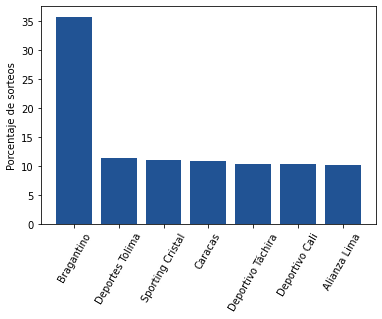

In [211]:
agrupar(temp_B3, 'Equipo')

,Sorteos (%)
Pais,
Brasil,35.78
Colombia,21.63
Perú,21.31
Venezuela,21.27


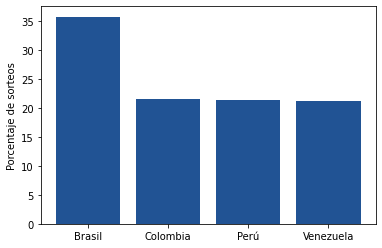

In [212]:
agrupar(temp_B3, 'Pais')

Bombo 4:

,Sorteos (%)
Equipo,
Fortaleza,33.26
América M.G.,11.98
Estudiantes L.P.,11.56
The Strongest,11.49
Olimpia,10.83
Always Ready,10.54
Independiente Petrolero,10.34


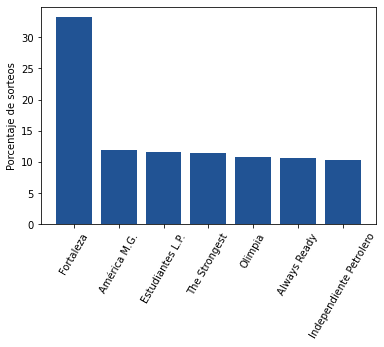

In [213]:
agrupar(temp_B4, 'Equipo')

,Sorteos (%)
Pais,
Brasil,45.24
Bolivia,32.37
Argentina,11.56
Paraguay,10.83


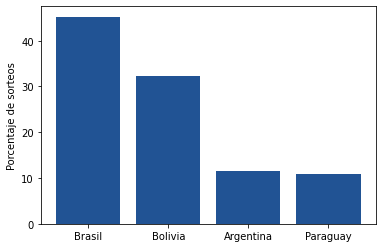

In [250]:
agrupar(temp_B4, 'Pais')

Bombos 3 y 4 en conjunto.

,Sorteos (%)
Equipo,
Bragantino,17.89
Fortaleza,16.63
América M.G.,5.99
Estudiantes L.P.,5.78
The Strongest,5.75
Deportes Tolima,5.66
Sporting Cristal,5.53
Caracas,5.43
Olimpia,5.42


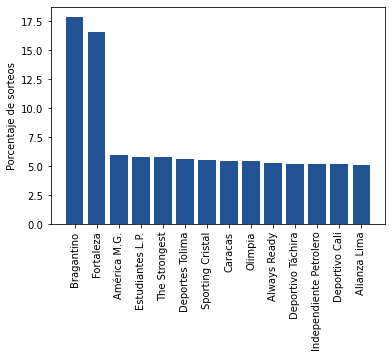

In [222]:
agrupar(temp_B3_y_B4, 'Equipo', rotacion = 90)

,Sorteos (%)
Pais,
Brasil,40.51
Bolivia,16.19
Colombia,10.82
Perú,10.65
Venezuela,10.64
Argentina,5.78
Paraguay,5.42


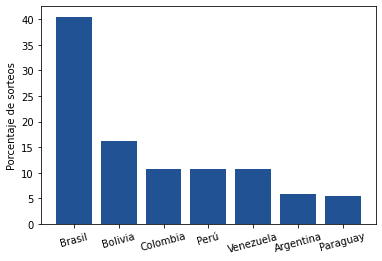

In [224]:
agrupar(temp_B3_y_B4, 'Pais', rotacion = 15)

Si el rival del bombo 1 es argentino, es muy probable que el grupo contenga un equipo brasileño.

**Si el rival del bombo 1 es uruguayo:**

In [225]:
# Buscar sorteos con equipos uruguayos en B1 (por id).
temp_df = df_uc[df_uc['id_sorteo'].isin(B1_uruguay['id_sorteo'].to_list())]

# Filtrar por bombos
temp_B3 = temp_df[temp_df['Bombo'] == 3]
temp_B4 = temp_df[temp_df['Bombo'] == 4]
temp_B3_y_B4 = temp_df[temp_df['Bombo'].isin([3,4])]

Bombo 3:

,Sorteos (%)
Equipo,
Bragantino,32.01
Colón,16.99
Sporting Cristal,9.31
Deportes Tolima,8.70
Caracas,8.49
Deportivo Táchira,8.45
Alianza Lima,8.29
Deportivo Cali,7.76


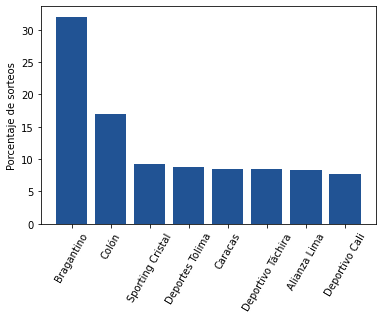

In [253]:
agrupar(temp_B3, 'Equipo')

,Sorteos (%)
Pais,
Brasil,32.01
Perú,17.60
Argentina,16.99
Venezuela,16.95
Colombia,16.45


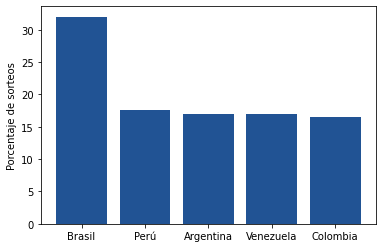

In [254]:
agrupar(temp_B3, 'Pais')

Bombo 4:

,Sorteos (%)
Equipo,
Fortaleza,31.80
Talleres,16.58
América M.G.,9.64
Always Ready,9.07
The Strongest,8.82
Olimpia,8.41
Independiente Petrolero,7.92
Estudiantes L.P.,7.76


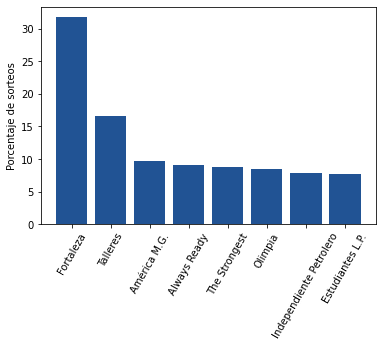

In [255]:
agrupar(temp_B4, 'Equipo')

,Sorteos (%)
Pais,
Brasil,41.44
Bolivia,25.81
Argentina,24.33
Paraguay,8.41


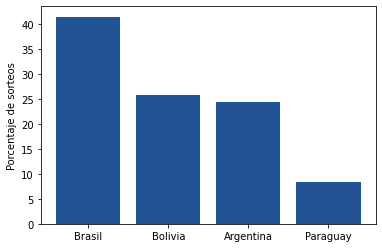

In [256]:
agrupar(temp_B4, 'Pais')

Bombos 3 y 4 en conjunto.

,Sorteos (%)
Equipo,
Bragantino,16.00
Fortaleza,15.90
Colón,8.49
Talleres,8.29
América M.G.,4.82
Sporting Cristal,4.66
Always Ready,4.53
The Strongest,4.41
Deportes Tolima,4.35


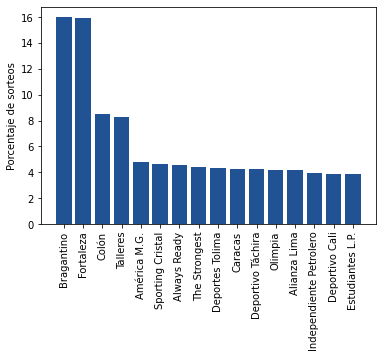

In [227]:
agrupar(temp_B3_y_B4, 'Equipo', rotacion = 90)

,Sorteos (%)
Pais,
Brasil,36.73
Argentina,20.66
Bolivia,12.91
Perú,8.80
Venezuela,8.47
Colombia,8.23
Paraguay,4.21


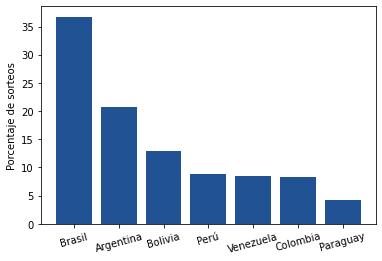

In [229]:
agrupar(temp_B3_y_B4, 'Pais', rotacion = 15)

### 4.3. Análisis de grupos con equipos brasileños y/o argentinos.

En esta sección se analiza el porcentaje de sorteos simulados en los que el grupo de la UC cumple las siguientes condiciones:

1. Contiene al menos un equipo brasileño.
   * Contiene un equipo brasileño.
   * Contiene dos equipos brasileños.
   
   
2. Contiene al menos un equipo argentino.
   * Contiene un equipo argentino.
   * Contiene dos equipos argentinos.
   
   
3. Contiene al menos un equipo brasileño y no tiene equipos argentinos.
   * Contiene un equipo brasileño y no tiene equipos argentinos.
   * Contiene dos equipos brasileños y no tiene equipos argentinos.
   
   
4. Contiene al menos un equipo argentino y no tiene equipos brasileños.
   * Contiene un equipo argentino y no tiene equipos brasileños.
   * Contiene dos equipos argentinos y no tiene equipos brasileños.
   
   
5. Contiene al menos un equipo brasileño y al menos un equipo argentino.
   * Contiene un equipó brasileño y un equipo argentino.
   * Contiene dos equipos brasileños y un equipo argentino.
   * Contiene dos equipos argentinos y un equipo brasileño.
   
   
6. No tiene equipos brasileños ni argentinos.

In [230]:
# Grupos con equipos brasileños.
# Obtener lista de ids unicos.
ids_unicos = list(df_uc['id_sorteo'].unique())

# Obtener equipos de Brasil 
equipos_brasil = df_uc[df_uc['Pais'] == 'Brasil']
                  
# Obtener ids de los sorteos en que se encuentran 
ids_grupos_brasil = equipos_brasil['id_sorteo'].to_list()
ids_grupos_brasil.sort()
                  
# Obtener valores únicos en la lista con ids:
ids_unicos_brasil = set(ids_grupos_brasil)

# Función que calcula el porcentaje de grupos que cumplen cierta condición (estos grupos se ingresan como lista o set de sus ids)
def porcentaje(lista):
    return round(len(lista)/len(ids_unicos) * 100, 1)

# Grupos con sólo un equipo brasileño y con dos equipos brasileños
from collections import Counter
# Cuenta cuantas veces se encuentra un id_sorteo en la lista de ids.
counts = Counter(ids_grupos_brasil)
# Sólo un brasileño
uno_de_brasil = [id for id in ids if counts[id] == 1]
# Dos brasileños
dos_de_brasil = [id for id in ids if counts[id] == 2]


# Grupos con equipos argentinos.

# Obtener equipos de Argentina
equipos_argentina = df_uc[df_uc['Pais'] == 'Argentina']
                  
# Obtener ids de los sorteos en que se encuentran 
ids_grupos_argentina  = equipos_argentina['id_sorteo'].to_list()
ids_grupos_argentina.sort()
                  
# Obtener valores únicos en la lista con ids:
ids_unicos_argentina = set(ids_grupos_argentina)

# Grupos con sólo un equipo argentino y con dos equipos argentinos
# Cuenta cuantas veces se encuentra un id_sorteo en la lista de ids.
counts = Counter(ids_grupos_argentina)
# Sólo un argentino
uno_de_argentina = [id for id in ids if counts[id] == 1]
# Dos argentinos
dos_de_argentina = [id for id in ids if counts[id] == 2]


# Grupos con equipos brasileños sin argentinos:
brasil_sin_argentina = ids_unicos_brasil - ids_unicos_argentina
uno_brasil_sin_argentina = set(uno_de_brasil) - ids_unicos_argentina
dos_brasil_sin_argentina = set(dos_de_brasil) - ids_unicos_argentina

# Grupos con equipos argentinos sin brasileños:
argentina_sin_brasil = ids_unicos_argentina - ids_unicos_brasil
uno_argentina_sin_brasil = set(uno_de_argentina) - ids_unicos_brasil
dos_argentina_sin_brasil = set(dos_de_argentina) - ids_unicos_brasil

# Grupos con equipos argentinos y brasileños
ids_unicos_argentina_brasil = ids_unicos_argentina & ids_unicos_brasil

# Con un argentino y un brasileño.
uno_y_uno = set(uno_de_argentina) & set(uno_de_brasil)
dos_argentina_uno_brasil = set(dos_de_argentina) & set(uno_de_brasil)
dos_brasil_uno_argentina = set(dos_de_brasil) & set(uno_de_argentina)

# Sin equipos brasileños ni argentinos:
# Obtener lista de ids con brasileños o argentinos, sacar el porcentaje y restarselo a 100
brasil_o_argentina = ids_unicos_brasil | ids_unicos_argentina

# Salida: 
print(f'Un {porcentaje(ids_unicos_brasil)}% de los grupos sorteados para la UC contiene al menos un equipo brasileño:')
print(f'--- Un {porcentaje(uno_de_brasil)}% de los grupos contiene sólo un equipo brasileño.')
print(f'--- Un {porcentaje(dos_de_brasil)}% de los grupos contiene dos equipos brasileños.')
print('')
print(f'Un {porcentaje(ids_unicos_argentina)}% de los grupos sorteados para la UC contiene al menos un equipo argentino:')
print(f'--- Un {porcentaje(uno_de_argentina)}% de los grupos contiene sólo un equipo argentino.')
print(f'--- Un {porcentaje(dos_de_argentina)}% de los grupos dos equipos argentinos.')
print('')
print(f'Un {porcentaje(brasil_sin_argentina)}% de los grupos sorteados para la UC contiene al menos un equipo brasileño y no tiene equipos argentinos:')
print(f'--- Un {porcentaje(uno_brasil_sin_argentina)}% de los grupos contiene sólo un equipo brasileño y no tiene equipos argentinos.')
print(f'--- Un {porcentaje(dos_brasil_sin_argentina)}% de los grupos dos equipos brasileños y no tiene equipos argentinos.')
print('')
print(f'Un {porcentaje(argentina_sin_brasil)}% de los grupos sorteados para la UC contiene al menos un equipo argentino y no tiene equipos brasileños:')
print(f'--- Un {porcentaje(uno_argentina_sin_brasil)}% de los grupos contiene sólo un equipo argentino y no tiene equipos brasileños.')
print(f'--- Un {porcentaje(dos_argentina_sin_brasil)}% de los grupos dos equipos argentinos y no tiene equipos brasileños.')
print('')
print(f'Un {porcentaje(ids_unicos_argentina_brasil)}% de los grupos sorteados para la UC contiene al menos un equipo brasileño y al menos un equipo argentino:')
print(f'--- Un {porcentaje(uno_y_uno)}% de los grupos contiene sólo un equipo argentino y sólo un equipo brasileño.')
print(f'--- Un {porcentaje(dos_brasil_uno_argentina)}% de los grupos contiene dos un equipos brasileños y uno argentino.')
print(f'--- Un {porcentaje(dos_argentina_uno_brasil)}% de los grupos contiene dos un equipos argentinos y uno brasileño.')
print('')
print(f'Un {100 - porcentaje(brasil_o_argentina)}% de los grupos sorteados para la UC no tiene equipos brasileños ni argentinos')

Un 87.4% de los grupos sorteados para la UC contiene al menos un equipo brasileño:
--- Un 77.5% de los grupos contiene sólo un equipo brasileño.
--- Un 9.9% de los grupos contiene dos equipos brasileños.

Un 60.6% de los grupos sorteados para la UC contiene al menos un equipo argentino:
--- Un 55.3% de los grupos contiene sólo un equipo argentino.
--- Un 5.3% de los grupos dos equipos argentinos.

Un 36.8% de los grupos sorteados para la UC contiene al menos un equipo brasileño y no tiene equipos argentinos:
--- Un 30.6% de los grupos contiene sólo un equipo brasileño y no tiene equipos argentinos.
--- Un 6.2% de los grupos dos equipos brasileños y no tiene equipos argentinos.

Un 10.1% de los grupos sorteados para la UC contiene al menos un equipo argentino y no tiene equipos brasileños:
--- Un 8.3% de los grupos contiene sólo un equipo argentino y no tiene equipos brasileños.
--- Un 1.8% de los grupos dos equipos argentinos y no tiene equipos brasileños.

Un 50.5% de los grupos sorte

Otra manera de visualizar esta distribución es crear una matriz en la que las columnas representen el número de equipos brasileños en el grupo, las filas representen el número de equipos argentinos en el grupo, y los valores de las intersecciones representen el porcentaje de simulaciones en las que el grupo de la UC cumple con el número de equipos de cada país. Por ejemplo, en la posición [0,0] debería ir 2,5% ya que es el porcentaje de simulaciones en las que el grupo de la Universidad Católica no contiene equipos brasileños ni argentinos.

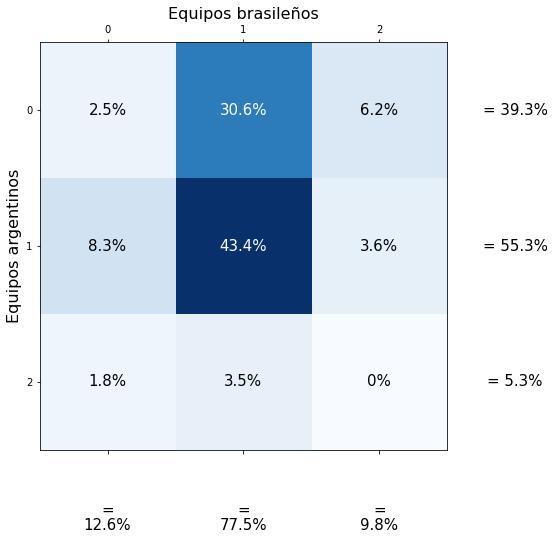

In [179]:
import matplotlib.cm as cm
import numpy as np
# Visualmente:
# Crear una matriz: las columnas representan el número de equipos brasileños en el grupo
#                   las filas representan el número de equipos argentinos en el grupo
#                   cada intesección entre filas y columnas es el porcentaje de grupos que cumplen esa condición.
#                   ej: en [0,0] se encuentra el porcentaje de grupos sin equipos brasileños ni argentinos
#                   ej: en [0,1] se encuentra el porcentaje de grupos con un equipo brasileño y sin equipos argentinos.
cero_argentinos = [100 - porcentaje(brasil_o_argentina), porcentaje(uno_brasil_sin_argentina), porcentaje(dos_brasil_sin_argentina)]
un_argentino = [porcentaje(uno_argentina_sin_brasil), porcentaje(uno_y_uno), porcentaje(dos_brasil_uno_argentina)]
dos_argentinos = [porcentaje(dos_argentina_sin_brasil), porcentaje(dos_argentina_uno_brasil), 0]

matriz = [cero_argentinos, un_argentino, dos_argentinos]
# Grafico
fig, ax = plt.subplots(figsize=(7.5,7.5
                               ))
ax.matshow(matriz,  cmap= cm.Blues);
plt.title('Equipos brasileños', size = 16)
plt.ylabel('Equipos argentinos', size = 16);

# Anotar los valores dentro del gráfico
size = 15 #tamaño de la letra
for i in range(len(matriz)):
    for j in range(len(cero_argentinos)):
        color = 'k'
        if matriz[i][j] > 30:
            color = 'w'
        text = ax.text(j, i, f'{matriz[i][j]}%',
                       ha="center", va="center", color=color, size = size)
        
for i in range(len(matriz)):
    row = np.asarray(matriz[i])
    suma = round(row.sum(), 1)
    text = ax.text(3, i, f'= {suma}%',
                       ha="center", va="center", color=color, size = size)
    

for j in range(len(un_argentino)):
    suma = 0
    for i in range(len(matriz)):
        suma += matriz[i][j]
    suma = round(suma, 1)
    text = ax.text(j, 3, '=',
                       ha="center", va="bottom", color=color, size = size)
    text = ax.text(j, 3, f'{suma}%',
                       ha="center", va="top", color=color, size=size)

### 4.4. Grupos más repetidos.



La función utilizada para encontrar sorteos iguales tarda horas en ejecutarse (falta encontrar la manera de hacerla más rápida), por lo que los resultados se guardan en el archivo grupos_iguales.csv. Se recomienda no ejecutar la siguiente celda. 

In [15]:
# No ejecutar esta celda
# Función que compara si grupos de dos sorteos distintos son iguales o no:
def es_igual(df, id1, id2):
    sorteo1 = set(df[df['id_sorteo'] == id1]['Equipo'])
    sorteo2 = set(df[df['id_sorteo'] == id2]['Equipo'])
    return sorteo1 == sorteo2

# Esta funcion tarda mucho en ejecutarse, hay que buscar otra forma de hacerlo
def encontrar_sorteos_iguales(df):
    ids = list(df['id_sorteo'].unique())
    sorteos_iguales = []
    for id1 in ids:
        nueva_fila = []
        ids_a_remover = []
        for id2 in ids:
            if es_igual(df, id1, id2):
                nueva_fila.append(id2)
                ids_a_remover.append(id2)
        sorteos_iguales.append(nueva_fila)
        ids = [id for id in ids if id not in ids_a_remover]
    return sorteos_iguales

# Comentado porque tarda mucho en ejecutarse
#sorteos_iguales = encontrar_sorteos_iguales(df_uc)
#sorteos_iguales.sort(key=len, reverse = True)
#sorteos_iguales_df = pd.DataFrame(sorteos_iguales)
#sorteos_iguales_df.to_csv('sorteos_iguales.csv', index = False)

0 - 12127
1 - 12036
2 - 12004
3 - 11903
4 - 11860
5 - 11778
6 - 11688
7 - 11683
8 - 11663
9 - 11631
10 - 11621
11 - 11587
12 - 11579
13 - 11555
14 - 11479
15 - 11460
16 - 11439
17 - 11415
18 - 11398
19 - 11398
20 - 11366
21 - 11306
22 - 11257
23 - 11244
24 - 11165
25 - 11101
26 - 11101
27 - 11080
28 - 11067
29 - 10968
30 - 10858
31 - 10858
32 - 10798
33 - 10758
34 - 10718
35 - 10718
36 - 10678
37 - 10649
38 - 10649
39 - 10633
40 - 10539
41 - 10475
42 - 10421
43 - 10378
44 - 10319
45 - 10260
46 - 10229
47 - 10176
48 - 10176
49 - 10126
50 - 10077
51 - 10021
52 - 9952
53 - 9952
54 - 9944
55 - 9936
56 - 9930
57 - 9904
58 - 9814
59 - 9814
60 - 9720
61 - 9655
62 - 9609
63 - 9526
64 - 9526
65 - 9429
66 - 9429
67 - 9395
68 - 9320
69 - 9256
70 - 9256
71 - 9220
72 - 9191
73 - 9169
74 - 9164
75 - 9116
76 - 9116
77 - 9116
78 - 9063
79 - 9027
80 - 8940
81 - 8940
82 - 8927
83 - 8891
84 - 8860
85 - 8804
86 - 8778
87 - 8739
88 - 8709
89 - 8709
90 - 8695
91 - 8627
92 - 8573
93 - 8510
94 - 8510
95 - 851

751 - 1718
752 - 1718
753 - 1718
754 - 1718
755 - 1718
756 - 1718
757 - 1718
758 - 1718
759 - 1718
760 - 1718
761 - 1718
762 - 1718
763 - 1718
764 - 1718
765 - 1718
766 - 1705
767 - 1705
768 - 1705
769 - 1688
770 - 1688
771 - 1688
772 - 1688
773 - 1688
774 - 1677
775 - 1677
776 - 1677
777 - 1677
778 - 1677
779 - 1677
780 - 1677
781 - 1677
782 - 1677
783 - 1677
784 - 1677
785 - 1677
786 - 1677
787 - 1667
788 - 1667
789 - 1636
790 - 1616
791 - 1616
792 - 1616
793 - 1616
794 - 1616
795 - 1616
796 - 1598
797 - 1598
798 - 1598
799 - 1598
800 - 1598
801 - 1598
802 - 1598
803 - 1598
804 - 1598
805 - 1598
806 - 1598
807 - 1598
808 - 1598
809 - 1598
810 - 1598
811 - 1598
812 - 1598
813 - 1598
814 - 1598
815 - 1598
816 - 1598
817 - 1598
818 - 1598
819 - 1598
820 - 1598
821 - 1598
822 - 1567
823 - 1567
824 - 1567
825 - 1567
826 - 1541
827 - 1541
828 - 1541
829 - 1541
830 - 1541
831 - 1541
832 - 1541
833 - 1541
834 - 1541
835 - 1541
836 - 1541
837 - 1541
838 - 1541
839 - 1521
840 - 1521
841 - 1521

1491 - 484
1492 - 484
1493 - 471
1494 - 471
1495 - 471
1496 - 471
1497 - 471
1498 - 471
1499 - 471
1500 - 471
1501 - 471
1502 - 471
1503 - 471
1504 - 471
1505 - 471
1506 - 471
1507 - 471
1508 - 471
1509 - 471
1510 - 471
1511 - 471
1512 - 471
1513 - 471
1514 - 471
1515 - 471
1516 - 471
1517 - 471
1518 - 471
1519 - 471
1520 - 471
1521 - 471
1522 - 471
1523 - 471
1524 - 471
1525 - 471
1526 - 471
1527 - 471
1528 - 471
1529 - 471
1530 - 471
1531 - 471
1532 - 471
1533 - 471
1534 - 471
1535 - 471
1536 - 471
1537 - 471
1538 - 471
1539 - 471
1540 - 471
1541 - 471
1542 - 471
1543 - 471
1544 - 471
1545 - 471
1546 - 471
1547 - 471
1548 - 471
1549 - 471
1550 - 471
1551 - 471
1552 - 471
1553 - 471
1554 - 471
1555 - 471
1556 - 471
1557 - 471
1558 - 471
1559 - 466
1560 - 466
1561 - 466
1562 - 466
1563 - 466
1564 - 466
1565 - 466
1566 - 458
1567 - 458
1568 - 458
1569 - 458
1570 - 458
1571 - 458
1572 - 458
1573 - 458
1574 - 458
1575 - 458
1576 - 447
1577 - 447
1578 - 447
1579 - 447
1580 - 447
1581 - 447

2236 - 226
2237 - 226
2238 - 226
2239 - 226
2240 - 226
2241 - 226
2242 - 226
2243 - 226
2244 - 226
2245 - 226
2246 - 226
2247 - 226
2248 - 226
2249 - 226
2250 - 226
2251 - 226
2252 - 226
2253 - 226
2254 - 226
2255 - 226
2256 - 226
2257 - 226
2258 - 226
2259 - 226
2260 - 226
2261 - 226
2262 - 226
2263 - 226
2264 - 226
2265 - 226
2266 - 226
2267 - 226
2268 - 226
2269 - 226
2270 - 226
2271 - 226
2272 - 226
2273 - 226
2274 - 226
2275 - 226
2276 - 226
2277 - 226
2278 - 226
2279 - 226
2280 - 226
2281 - 226
2282 - 226
2283 - 226
2284 - 226
2285 - 226
2286 - 226
2287 - 226
2288 - 226
2289 - 226
2290 - 219
2291 - 207
2292 - 207
2293 - 207
2294 - 207
2295 - 207
2296 - 207
2297 - 200
2298 - 187
2299 - 187
2300 - 187
2301 - 187
2302 - 187
2303 - 187
2304 - 187
2305 - 187
2306 - 187
2307 - 187
2308 - 187
2309 - 187
2310 - 187
2311 - 187
2312 - 187
2313 - 187
2314 - 187
2315 - 187
2316 - 187
2317 - 187
2318 - 187
2319 - 187
2320 - 187
2321 - 187
2322 - 187
2323 - 187
2324 - 187
2325 - 187
2326 - 187

2984 - 99
2985 - 99
2986 - 99
2987 - 89
2988 - 89
2989 - 89
2990 - 89
2991 - 89
2992 - 89
2993 - 89
2994 - 89
2995 - 89
2996 - 89
2997 - 89
2998 - 89
2999 - 89
3000 - 89
3001 - 89
3002 - 89
3003 - 89
3004 - 89
3005 - 89
3006 - 89
3007 - 89
3008 - 89
3009 - 89
3010 - 89
3011 - 89
3012 - 89
3013 - 89
3014 - 89
3015 - 89
3016 - 89
3017 - 89
3018 - 89
3019 - 89
3020 - 89
3021 - 89
3022 - 89
3023 - 89
3024 - 89
3025 - 89
3026 - 89
3027 - 89
3028 - 89
3029 - 89
3030 - 89
3031 - 89
3032 - 89
3033 - 89
3034 - 89
3035 - 89
3036 - 89
3037 - 89
3038 - 89
3039 - 89
3040 - 89
3041 - 89
3042 - 89
3043 - 89
3044 - 89
3045 - 89
3046 - 89
3047 - 89
3048 - 89
3049 - 89
3050 - 89
3051 - 89
3052 - 89
3053 - 89
3054 - 89
3055 - 89
3056 - 89
3057 - 89
3058 - 89
3059 - 89
3060 - 89
3061 - 89
3062 - 89
3063 - 89
3064 - 89
3065 - 89
3066 - 89
3067 - 89
3068 - 89
3069 - 89
3070 - 89
3071 - 89
3072 - 89
3073 - 89
3074 - 89
3075 - 89
3076 - 89
3077 - 89
3078 - 89
3079 - 89
3080 - 89
3081 - 89
3082 - 89
3083 - 89


3806 - 47
3807 - 47
3808 - 47
3809 - 47
3810 - 47
3811 - 47
3812 - 47
3813 - 47
3814 - 47
3815 - 47
3816 - 47
3817 - 47
3818 - 47
3819 - 47
3820 - 47
3821 - 47
3822 - 47
3823 - 47
3824 - 47
3825 - 47
3826 - 47
3827 - 47
3828 - 47
3829 - 47
3830 - 47
3831 - 47
3832 - 47
3833 - 47
3834 - 47
3835 - 47
3836 - 47
3837 - 47
3838 - 47
3839 - 47
3840 - 47
3841 - 47
3842 - 47
3843 - 47
3844 - 47
3845 - 47
3846 - 47
3847 - 47
3848 - 47
3849 - 47
3850 - 47
3851 - 47
3852 - 47
3853 - 47
3854 - 47
3855 - 47
3856 - 47
3857 - 47
3858 - 47
3859 - 47
3860 - 47
3861 - 47
3862 - 47
3863 - 47
3864 - 47
3865 - 47
3866 - 47
3867 - 47
3868 - 47
3869 - 47
3870 - 47
3871 - 47
3872 - 47
3873 - 47
3874 - 47
3875 - 47
3876 - 47
3877 - 47
3878 - 47
3879 - 47
3880 - 47
3881 - 47
3882 - 47
3883 - 47
3884 - 47
3885 - 47
3886 - 47
3887 - 47
3888 - 47
3889 - 47
3890 - 47
3891 - 31
3892 - 31
3893 - 31
3894 - 31
3895 - 31
3896 - 31
3897 - 31
3898 - 31
3899 - 31
3900 - 31
3901 - 31
3902 - 31
3903 - 31
3904 - 31
3905 - 31


4627 - 28
4628 - 28
4629 - 28
4630 - 28
4631 - 28
4632 - 28
4633 - 28
4634 - 28
4635 - 28
4636 - 28
4637 - 28
4638 - 28
4639 - 28
4640 - 28
4641 - 28
4642 - 28
4643 - 28
4644 - 28
4645 - 28
4646 - 28
4647 - 28
4648 - 28
4649 - 28
4650 - 28
4651 - 28
4652 - 28
4653 - 28
4654 - 28
4655 - 28
4656 - 28
4657 - 28
4658 - 28
4659 - 28
4660 - 28
4661 - 28
4662 - 28
4663 - 28
4664 - 28
4665 - 28
4666 - 28
4667 - 28
4668 - 28
4669 - 28
4670 - 28
4671 - 28
4672 - 28
4673 - 28
4674 - 28
4675 - 28
4676 - 28
4677 - 28
4678 - 28
4679 - 28
4680 - 28
4681 - 28
4682 - 28
4683 - 28
4684 - 28
4685 - 28
4686 - 28
4687 - 28
4688 - 28
4689 - 28
4690 - 28
4691 - 28
4692 - 28
4693 - 28
4694 - 28
4695 - 28
4696 - 28
4697 - 28
4698 - 28
4699 - 28
4700 - 28
4701 - 28
4702 - 28
4703 - 28
4704 - 28
4705 - 28
4706 - 28
4707 - 28
4708 - 28
4709 - 28
4710 - 28
4711 - 28
4712 - 28
4713 - 28
4714 - 28
4715 - 28
4716 - 28
4717 - 28
4718 - 28
4719 - 28
4720 - 28
4721 - 28
4722 - 28
4723 - 28
4724 - 28
4725 - 28
4726 - 28


5448 - 17
5449 - 17
5450 - 17
5451 - 17
5452 - 17
5453 - 17
5454 - 17
5455 - 17
5456 - 17
5457 - 17
5458 - 17
5459 - 17
5460 - 17
5461 - 17
5462 - 17
5463 - 17
5464 - 17
5465 - 17
5466 - 17
5467 - 17
5468 - 17
5469 - 17
5470 - 17
5471 - 17
5472 - 17
5473 - 17
5474 - 17
5475 - 17
5476 - 17
5477 - 17
5478 - 17
5479 - 17
5480 - 17
5481 - 17
5482 - 17
5483 - 17
5484 - 17
5485 - 17
5486 - 17
5487 - 17
5488 - 17
5489 - 17
5490 - 17
5491 - 17
5492 - 17
5493 - 17
5494 - 17
5495 - 17
5496 - 17
5497 - 17
5498 - 17
5499 - 17
5500 - 17
5501 - 17
5502 - 17
5503 - 17
5504 - 17
5505 - 17
5506 - 17
5507 - 17
5508 - 17
5509 - 17
5510 - 17
5511 - 17
5512 - 17
5513 - 17
5514 - 17
5515 - 17
5516 - 17
5517 - 17
5518 - 17
5519 - 17
5520 - 17
5521 - 17
5522 - 17
5523 - 17
5524 - 17
5525 - 17
5526 - 17
5527 - 17
5528 - 17
5529 - 17
5530 - 17
5531 - 17
5532 - 17
5533 - 17
5534 - 17
5535 - 17
5536 - 17
5537 - 17
5538 - 17
5539 - 17
5540 - 17
5541 - 17
5542 - 17
5543 - 17
5544 - 17
5545 - 17
5546 - 17
5547 - 17


6312 - 6
6313 - 6
6314 - 6
6315 - 6
6316 - 6
6317 - 6
6318 - 6
6319 - 6
6320 - 6
6321 - 6
6322 - 6
6323 - 6
6324 - 6
6325 - 6
6326 - 6
6327 - 6
6328 - 6
6329 - 6
6330 - 6
6331 - 6
6332 - 6
6333 - 6
6334 - 6
6335 - 6
6336 - 6
6337 - 6
6338 - 6
6339 - 6
6340 - 6
6341 - 6
6342 - 6
6343 - 6
6344 - 6
6345 - 6
6346 - 6
6347 - 6
6348 - 6
6349 - 6
6350 - 6
6351 - 6
6352 - 6
6353 - 6
6354 - 6
6355 - 6
6356 - 6
6357 - 6
6358 - 6
6359 - 6
6360 - 6
6361 - 6
6362 - 6
6363 - 6
6364 - 6
6365 - 6
6366 - 6
6367 - 6
6368 - 6
6369 - 6
6370 - 6
6371 - 6
6372 - 6
6373 - 6
6374 - 6
6375 - 6
6376 - 6
6377 - 6
6378 - 6
6379 - 6
6380 - 6
6381 - 6
6382 - 6
6383 - 6
6384 - 6
6385 - 6
6386 - 6
6387 - 6
6388 - 6
6389 - 6
6390 - 6
6391 - 6
6392 - 6
6393 - 6
6394 - 6
6395 - 6
6396 - 6
6397 - 6
6398 - 6
6399 - 6
6400 - 6
6401 - 6
6402 - 6
6403 - 6
6404 - 6
6405 - 6
6406 - 6
6407 - 6
6408 - 6
6409 - 6
6410 - 6
6411 - 6
6412 - 6
6413 - 6
6414 - 6
6415 - 6
6416 - 6
6417 - 6
6418 - 6
6419 - 6
6420 - 6
6421 - 6
6422 - 6
6

7239 - 1
7240 - 1
7241 - 1
7242 - 1
7243 - 1
7244 - 1
7245 - 1
7246 - 1
7247 - 1
7248 - 1
7249 - 1
7250 - 1
7251 - 1
7252 - 1
7253 - 1
7254 - 1
7255 - 1
7256 - 1
7257 - 1
7258 - 1
7259 - 1
7260 - 1
7261 - 1
7262 - 1
7263 - 1
7264 - 1
7265 - 1
7266 - 1
7267 - 1
7268 - 1
7269 - 1
7270 - 1
7271 - 1
7272 - 1
7273 - 1
7274 - 1
7275 - 1
7276 - 1
7277 - 1
7278 - 1
7279 - 1
7280 - 1
7281 - 1
7282 - 1
7283 - 1
7284 - 1
7285 - 1
7286 - 1
7287 - 1
7288 - 1
7289 - 1
7290 - 1
7291 - 1
7292 - 1
7293 - 1
7294 - 1
7295 - 1
7296 - 1
7297 - 1
7298 - 1
7299 - 1
7300 - 1
7301 - 1
7302 - 1
7303 - 1
7304 - 1
7305 - 1
7306 - 1
7307 - 1
7308 - 1
7309 - 1
7310 - 1
7311 - 1
7312 - 1
7313 - 1
7314 - 1
7315 - 1
7316 - 1
7317 - 1
7318 - 1
7319 - 1
7320 - 1
7321 - 1
7322 - 1
7323 - 1
7324 - 1
7325 - 1
7326 - 1
7327 - 1
7328 - 1
7329 - 1
7330 - 1
7331 - 1
7332 - 1
7333 - 1
7334 - 1
7335 - 1
7336 - 1
7337 - 1
7338 - 1
7339 - 1
7340 - 1
7341 - 1
7342 - 1
7343 - 1
7344 - 1
7345 - 1
7346 - 1
7347 - 1
7348 - 1
7349 - 1
7

8738 - 1
8739 - 1
8740 - 1
8741 - 1
8742 - 1
8743 - 1
8744 - 1
8745 - 1
8746 - 1
8747 - 1
8748 - 1
8749 - 1
8750 - 1
8751 - 1
8752 - 1
8753 - 1
8754 - 1
8755 - 1
8756 - 1
8757 - 1
8758 - 1
8759 - 1
8760 - 1
8761 - 1
8762 - 1
8763 - 1
8764 - 1
8765 - 1
8766 - 1
8767 - 1
8768 - 1
8769 - 1
8770 - 1
8771 - 1
8772 - 1
8773 - 1
8774 - 1
8775 - 1
8776 - 1
8777 - 1
8778 - 1
8779 - 1
8780 - 1
8781 - 1
8782 - 1
8783 - 1
8784 - 1
8785 - 1
8786 - 1
8787 - 1
8788 - 1
8789 - 1
8790 - 1
8791 - 1
8792 - 1
8793 - 1
8794 - 1
8795 - 1
8796 - 1
8797 - 1
8798 - 1
8799 - 1
8800 - 1
8801 - 1
8802 - 1
8803 - 1
8804 - 1
8805 - 1
8806 - 1
8807 - 1
8808 - 1
8809 - 1
8810 - 1
8811 - 1
8812 - 1
8813 - 1
8814 - 1
8815 - 1
8816 - 1
8817 - 1
8818 - 1
8819 - 1
8820 - 1
8821 - 1
8822 - 1
8823 - 1
8824 - 1
8825 - 1
8826 - 1
8827 - 1
8828 - 1
8829 - 1
8830 - 1
8831 - 1
8832 - 1
8833 - 1
8834 - 1
8835 - 1
8836 - 1
8837 - 1
8838 - 1
8839 - 1
8840 - 1
8841 - 1
8842 - 1
8843 - 1
8844 - 1
8845 - 1
8846 - 1
8847 - 1
8848 - 1
8

10207 - 1
10208 - 1
10209 - 1
10210 - 1
10211 - 1
10212 - 1
10213 - 1
10214 - 1
10215 - 1
10216 - 1
10217 - 1
10218 - 1
10219 - 1
10220 - 1
10221 - 1
10222 - 1
10223 - 1
10224 - 1
10225 - 1
10226 - 1
10227 - 1
10228 - 1
10229 - 1
10230 - 1
10231 - 1
10232 - 1
10233 - 1
10234 - 1
10235 - 1
10236 - 1
10237 - 1
10238 - 1
10239 - 1
10240 - 1
10241 - 1
10242 - 1
10243 - 1
10244 - 1
10245 - 1
10246 - 1
10247 - 1
10248 - 1
10249 - 1
10250 - 1
10251 - 1
10252 - 1
10253 - 1
10254 - 1
10255 - 1
10256 - 1
10257 - 1
10258 - 1
10259 - 1
10260 - 1
10261 - 1
10262 - 1
10263 - 1
10264 - 1
10265 - 1
10266 - 1
10267 - 1
10268 - 1
10269 - 1
10270 - 1
10271 - 1
10272 - 1
10273 - 1
10274 - 1
10275 - 1
10276 - 1
10277 - 1
10278 - 1
10279 - 1
10280 - 1
10281 - 1
10282 - 1
10283 - 1
10284 - 1
10285 - 1
10286 - 1
10287 - 1
10288 - 1
10289 - 1
10290 - 1
10291 - 1
10292 - 1
10293 - 1
10294 - 1
10295 - 1
10296 - 1
10297 - 1
10298 - 1
10299 - 1
10300 - 1
10301 - 1
10302 - 1
10303 - 1
10304 - 1
10305 - 1
10306 - 1


11680 - 1
11681 - 1
11682 - 1
11683 - 1
11684 - 1
11685 - 1
11686 - 1
11687 - 1
11688 - 1
11689 - 1
11690 - 1
11691 - 1
11692 - 1
11693 - 1
11694 - 1
11695 - 1
11696 - 1
11697 - 1
11698 - 1
11699 - 1
11700 - 1
11701 - 1
11702 - 1
11703 - 1
11704 - 1
11705 - 1
11706 - 1
11707 - 1
11708 - 1
11709 - 1
11710 - 1
11711 - 1
11712 - 1
11713 - 1
11714 - 1
11715 - 1
11716 - 1
11717 - 1
11718 - 1
11719 - 1
11720 - 1
11721 - 1
11722 - 1
11723 - 1
11724 - 1
11725 - 1
11726 - 1
11727 - 1
11728 - 1
11729 - 1
11730 - 1
11731 - 1
11732 - 1
11733 - 1
11734 - 1
11735 - 1
11736 - 1
11737 - 1
11738 - 1
11739 - 1
11740 - 1
11741 - 1
11742 - 1
11743 - 1
11744 - 1
11745 - 1
11746 - 1
11747 - 1
11748 - 1
11749 - 1
11750 - 1
11751 - 1
11752 - 1
11753 - 1
11754 - 1
11755 - 1
11756 - 1
11757 - 1
11758 - 1
11759 - 1
11760 - 1
11761 - 1
11762 - 1
11763 - 1
11764 - 1
11765 - 1
11766 - 1
11767 - 1
11768 - 1
11769 - 1
11770 - 1
11771 - 1
11772 - 1
11773 - 1
11774 - 1
11775 - 1
11776 - 1
11777 - 1
11778 - 1
11779 - 1


In [41]:
import numpy as np
# Cargar sorteos iguales
sorteos_iguales_df = pd.read_csv('sorteos_iguales.csv')
ids_unicos = df_uc['id_sorteo'].unique()

# Función para crear dataframe de sorteos y el número de veces que se repite.
def show_sorteos_iguales(sorteos_iguales_df):
    output_df = pd.DataFrame()
    for i in range(len(sorteos_iguales_df)):
        id_sorteo = sorteos_iguales_df.iloc[i][0]
        if np.isnan(id_sorteo):
            return output_df
        grupo = df_uc[df_uc['id_sorteo'] == id_sorteo]
        equipos = grupo['Equipo'].to_list()
        repeticiones = round(sorteos_iguales_df.iloc[i].count()/len(ids_unicos) * 100,3)
        fila = equipos + [repeticiones]
        temp_df = pd.DataFrame(data=[fila], columns=['B1', 'B2', 'B3', 'B4', 'Repeticiones (%)'])
        output_df = pd.concat([output_df, temp_df])

show_sorteos_iguales(sorteos_iguales_df).head()

,B1,B2,B3,B4,Repeticiones (%)
0,River Plate,Universidad Católica,Bragantino,América M.G.,0.907
0,Peñarol,Universidad Católica,Bragantino,Talleres,0.891
0,Boca Juniors,Universidad Católica,Deportes Tolima,Fortaleza,0.866
0,Nacional,Universidad Católica,Colón,Fortaleza,0.833
0,River Plate,Universidad Católica,Bragantino,Always Ready,0.816


En primer lugar, ningún sorteo se repite en más de un 1% se las simulaciones realizadas. Se puede observar que los cinco sorteos más repetidos no contienen equipos brasileños como cabezas de serie, lo que limita la cantidad de rivales posibles de los bombos 3 y 4 debido a la regla de no repetir dos equipos del mismo país. El no tener un rival brasileño como cabeza de serie aumenta la probabilidad de que los rivales del bombo 3 o 4 sean brasileños. En el bombo 3 sólo se encuentra Bragantino y en el bombo 4 sólo está Fortaleza.

_Encuentro extraño que el grupo de Boca Juniors - Bragantino y América M.G. no tenga un % similar al más repetido. Yo pensaba que Boca y River serían equivalentes ya que ambos son argentinos. Lo mismo para Nacional y Peñarol. Esto me hace dudar un poco de lo "random" de la función utilizada para simular los sorteos._ 


### 5. Encontrar grupos que contengan a un equipo.

Esta sección tiene como finalidad encontrar grupos posibles siguiendo el sorteo en vivo. Se hará una función para buscar sorteos más repetidos que contengan ciertos equipos. Se entrega como input los equipos disponibles de cada bombo y como output se obtienen los sorteos posibles con el número de repeticiones de cada uno de ellos.

In [67]:
def es_igual(df, id1, id2):
    sorteo1 = set(df[df['id_sorteo'] == id1]['Equipo'])
    sorteo2 = set(df[df['id_sorteo'] == id2]['Equipo'])
    return sorteo1 == sorteo2

def encontrar_sorteos_iguales(df):
    ids = list(df['id_sorteo'].unique())
    sorteos_iguales = []
    for id1 in ids:
        nueva_fila = []
        ids_a_remover = []
        for id2 in ids:
            if es_igual(df, id1, id2):
                nueva_fila.append(id2)
                ids_a_remover.append(id2)
        sorteos_iguales.append(nueva_fila)
        ids = [id for id in ids if id not in ids_a_remover]
    sorteos_iguales.sort(key=len, reverse = True)
    sorteos_iguales_df = pd.DataFrame(sorteos_iguales)
    return sorteos_iguales_df

def encontrar_grupos_posibles(bombo1, bombo3, bombo4):
    # Bombo 1
    ids_posibles = df_uc[df_uc['Equipo'].isin(bombo1)]['id_sorteo'].to_list()
    
    # Bombo 3
    ids_posibles = df_uc[(df_uc['Equipo'].isin(bombo3)) & (df_uc['id_sorteo'].isin(ids_posibles))]['id_sorteo'].to_list()
    
    # Bombo 4
    ids_posibles = df_uc[(df_uc['Equipo'].isin(bombo4)) & (df_uc['id_sorteo'].isin(ids_posibles))]['id_sorteo'].to_list()
    
    grupos_posibles = df_uc[df_uc['id_sorteo'].isin(ids_posibles)]
    return grupos_posibles

bombo1 = ['Palmeiras', 'River Plate', 'Boca Juniors', 'Peñarol', 'Nacional', 'Athletico Paranaense', 'Flamengo', 'Atlético Mineiro']
bombo3 = ['Sporting Cristal', 'Bragantino', 'Caracas', 'Deportivo Cali', 'Deportivo Táchira', 'Alianza Lima', 'Colón', 'Deportes Tolima']
bombo4 = ['Olimpia', 'Fortaleza', 'The Strongest', 'Estudiantes L.P.', 'Always Ready', 'Independiente Petrolero', 'América M.G.', 'Talleres']

b1 = ['Flamengo']
b3 = bombo3
b4 = bombo4

import time
start_time = time.time()
grupos_posibles = encontrar_grupos_posibles(b1, b3, b4)
sorteos_iguales_df = encontrar_sorteos_iguales(grupos_posibles)
sp = show_sorteos_iguales(sorteos_iguales_df)
print("--- %s seconds ---" % (time.time() - start_time))
sp

--- 64.70211577415466 seconds ---


,B1,B2,B3,B4,Repeticiones (%)
0,Flamengo,Universidad Católica,Colón,Always Ready,0.627
0,Flamengo,Universidad Católica,Sporting Cristal,Talleres,0.569
0,Flamengo,Universidad Católica,Colón,Estudiantes L.P.,0.528
0,Flamengo,Universidad Católica,Colón,Olimpia,0.511
0,Flamengo,Universidad Católica,Colón,The Strongest,0.495
0,Flamengo,Universidad Católica,Colón,América M.G.,0.495
0,Flamengo,Universidad Católica,Deportivo Cali,Talleres,0.486
0,Flamengo,Universidad Católica,Caracas,Talleres,0.478
0,Flamengo,Universidad Católica,Alianza Lima,Talleres,0.478
0,Flamengo,Universidad Católica,Colón,Independiente Petrolero,0.462


# 6. Sorteo original

In [63]:
equipos = ['Flamengo', 'Universidad Católica', 'Sporting Cristal', 'Talleres'] 

ids = df_uc['id_sorteo'].unique()
grupos = []
for id in ids:
    grupo = df_uc[df_uc['id_sorteo'] == id]
    if grupo['Equipo'].to_list() == equipos:
        grupos.append(id)
        
len(grupos)/len(ids) * 100

0.5689313984168866